# Country Wide COVID-19 Dataset

Content
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus
Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.
Acknowledgements
The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries
Data about age structure for every country comes from wikipedia
Inspiration
It's possible to use this dataset for various purposes and analyses
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)

https://github.com/dsrscientist/COVID_19_Datasets/blob/master/worldometer_snapshots_April18_to_May18.csv

https://github.com/dsrscientist/COVID_19_Datasets/blob/master/population_structure_by_age_per_contry.csv


In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the datasets 
world_meter = pd.read_csv('worldometer_snapshots_April18_to_May18.csv', engine = 'python')
world_meter.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,18-04-2020,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,18-04-2020,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,18-04-2020,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,18-04-2020,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,18-04-2020,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
world_meter.shape

(6603, 9)

In [4]:
world_meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
Date                   6603 non-null object
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [5]:
# I want to consider the date feature as an index so we can work with the dataset as a timeseries dataset.
# But as we see, the date column is and object. - first let us change its datatype to date and then set it as the index of the dataset.

world_meter['Date']= pd.to_datetime(world_meter['Date'], format='%d-%m-%Y')

In [6]:
world_meter = world_meter.set_index('Date')

In [7]:
world_meter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2020-04-18 to 2020-05-18
Data columns (total 8 columns):
Country                6603 non-null object
Population             6603 non-null int64
Total Tests            5505 non-null float64
Total Cases            6554 non-null float64
Total Deaths           5367 non-null float64
Total Recovered        6318 non-null float64
Serious or Critical    4117 non-null float64
Active Cases           6544 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 464.3+ KB


As we can now see, in line 2 of the output above, the index of the dataset is now datetime and i.e. our same date field. also, the range is from 18-04-2020 to 18-05-2020 for a total of 31 days

With this we will be able to use all of pandas’ time-based indexing to wrangle and analyze our data

In [8]:
# Identifying the features where values are missing
world_meter.isnull().sum()

Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

as we can see, Missing data is present for the total tests conducted, about the death counts, and also related to the severity and critical conditions of the patients.. 
Let us explore further

In [9]:
# Setting the default figure size 
sns.set(rc={'figure.figsize':(11, 4)})

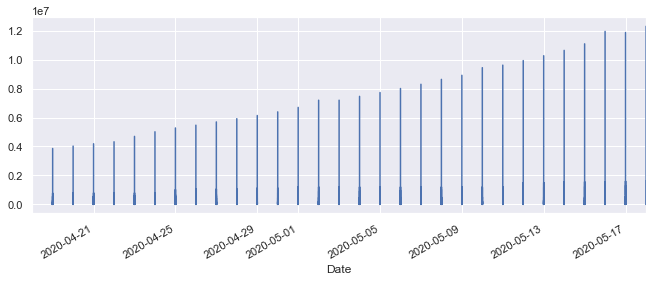

In [10]:
# Let us see how the total worlwide tests were conducted on each day 
world_meter.loc['2020-04-15':'2020-05-20','Total Tests'].plot()

this depicts that each day the total tests performed have been increasing 

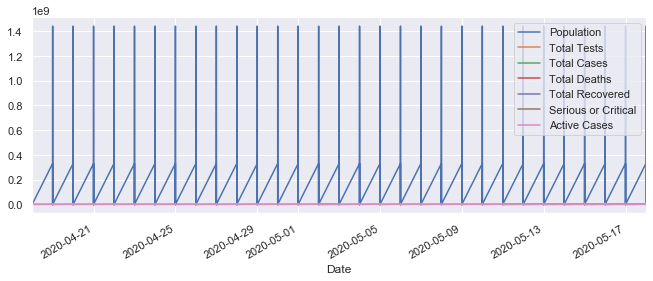

In [11]:
world_meter.plot.line()

In [12]:
# aggr = world_meter.groupby('Country')['Active Cases'].sum()
aggr = world_meter.groupby('Country').sum()
aggr.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Country,,,,,,,
Afghanistan,1203337819,382382.0,97988.0,2740.0,12268.0,246.0,83202.0
Albania,89222805,273700.0,24227.0,915.0,16353.0,142.0,6983.0
Algeria,1356335963,198359.0,142955.0,14356.0,65672.0,882.0,63102.0
Andorra,2394781,58094.0,23061.0,1359.0,14214.0,410.0,7488.0
Angola,1014685273,62123.0,1079.0,63.0,316.0,0.0,700.0


In [13]:
aggr['Active % of Total Population'] = (aggr['Active Cases']/aggr['Population'])*100
aggr['Recovery % of Total Cases'] = (aggr['Total Recovered']/aggr['Total Cases'])*100
aggr['Critical % of Total Active Cases'] = (aggr['Serious or Critical']/aggr['Active Cases'])*100
aggr.head()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Active % of Total Population,Recovery % of Total Cases,Critical % of Total Active Cases
Country,,,,,,,,,,
Afghanistan,1203337819,382382.0,97988.0,2740.0,12268.0,246.0,83202.0,0.006914,12.519900,0.295666
Albania,89222805,273700.0,24227.0,915.0,16353.0,142.0,6983.0,0.007826,67.499071,2.033510
Algeria,1356335963,198359.0,142955.0,14356.0,65672.0,882.0,63102.0,0.004652,45.938932,1.397737
Andorra,2394781,58094.0,23061.0,1359.0,14214.0,410.0,7488.0,0.312680,61.636529,5.475427
Angola,1014685273,62123.0,1079.0,63.0,316.0,0.0,700.0,0.000069,29.286376,0.000000


In [14]:
age_wise_popl = pd.read_csv('population_structure_by_age_per_contry.csv', engine = 'python')
age_wise_popl.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [15]:
age_wise_popl['total'] = age_wise_popl['Fraction age 0-14 years']+age_wise_popl['Fraction age 15-64 years']+age_wise_popl['Fraction age 65+ years']
age_wise_popl.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,total
0,USA,0.189,0.657,0.154,1.0
1,Russia,0.176,0.682,0.142,1.0
2,Spain,0.147,0.659,0.194,1.0
3,Brazil,0.217,0.697,0.086,1.0
4,UK,0.177,0.638,0.185,1.0


In [16]:
# Unpivoting the above dataset so that we can reuse it with our world_meter dataset
popl_frac = age_wise_popl.melt(id_vars=['Country'], var_name='Age_group', value_name='Population Fraction')
popl_frac.head()

,Country,Age_group,Population Fraction
0,USA,Fraction age 0-14 years,0.189
1,Russia,Fraction age 0-14 years,0.176
2,Spain,Fraction age 0-14 years,0.147
3,Brazil,Fraction age 0-14 years,0.217
4,UK,Fraction age 0-14 years,0.177


In [17]:
df = aggr
print(df.head())
df = df.reset_index()
print(df.head())

             Population  Total Tests  Total Cases  Total Deaths  \
Country                                                           
Afghanistan  1203337819     382382.0      97988.0        2740.0   
Albania        89222805     273700.0      24227.0         915.0   
Algeria      1356335963     198359.0     142955.0       14356.0   
Andorra         2394781      58094.0      23061.0        1359.0   
Angola       1014685273      62123.0       1079.0          63.0   

             Total Recovered  Serious or Critical  Active Cases  \
Country                                                           
Afghanistan          12268.0                246.0       83202.0   
Albania              16353.0                142.0        6983.0   
Algeria              65672.0                882.0       63102.0   
Andorra              14214.0                410.0        7488.0   
Angola                 316.0                  0.0         700.0   

             Active % of Total Population  Recovery % of Tot

In [18]:
print(popl_frac.head())

  Country                Age_group  Population Fraction
0     USA  Fraction age 0-14 years                0.189
1  Russia  Fraction age 0-14 years                0.176
2   Spain  Fraction age 0-14 years                0.147
3  Brazil  Fraction age 0-14 years                0.217
4      UK  Fraction age 0-14 years                0.177


In [19]:
df_new = df[df['Country'] == 'Albania']
df_new

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Active % of Total Population,Recovery % of Total Cases,Critical % of Total Active Cases
1,Albania,89222805,273700.0,24227.0,915.0,16353.0,142.0,6983.0,0.007826,67.499071,2.03351


In [20]:
a = popl_frac[(popl_frac['Country']=='Albania') & (popl_frac['Age_group'] != 'total') ]
a

,Country,Age_group,Population Fraction
103,Albania,Fraction age 0-14 years,0.174
316,Albania,Fraction age 15-64 years,0.689
529,Albania,Fraction age 65+ years,0.132


In [21]:
columns = df.columns
columns = ['Population', 'Total Tests', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Serious or Critical', 'Active Cases']